In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
!pip install plotly

In [9]:
covid_df = pd.read_csv("C:/Users/DELL/Desktop/covid_19_india.new.csv")

In [10]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3


In [12]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [13]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [14]:
vaccine_df = pd.read_csv("C:/Users/DELL/Desktop/covid_vaccine_statewise.csv")

In [15]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [20]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], inplace = True, axis = 1)

In [21]:
covid_df.head(7)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1/30/2020,Kerala,0,0,1
1,1/31/2020,Kerala,0,0,1
2,2/1/2020,Kerala,0,0,2
3,2/2/2020,Kerala,0,0,3
4,2/3/2020,Kerala,0,0,3
5,2/4/2020,Kerala,0,0,3
6,2/5/2020,Kerala,0,0,3


In [28]:
covid_df["Date"] = pd.to_datetime(covid_df["Date"],format ="%m-%Y-%d" )


ValueError: time data '1/30/2020' does not match format '%m-%Y-%d' (match)

In [29]:
#Activecases
covid_df['Active_cases']=covid_df['Confirmed']-(covid_df['Cured'] +covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
18105,8/11/2021,Telangana,638410,3831,650353,8112
18106,8/11/2021,Tripura,77811,773,80660,2076
18107,8/11/2021,Uttarakhand,334650,7368,342462,444
18108,8/11/2021,Uttar Pradesh,1685492,22775,1708812,545
18109,8/11/2021,West Bengal,1506532,18252,1534999,10215


In [31]:
statewise = pd.pivot_table(covid_df ,values = ["Confirmed","Deaths","Cured"],index = "State/UnionTerritory",aggfunc = max)

In [33]:
statewise["Recovery Rate"]= statewise["Cured"]*100/statewise["Confirmed"]

In [34]:
statewise["Mortality Rate"]= statewise["Deaths"]*100/statewise["Confirmed"]

In [35]:
statewise = statewise.sort_values(by ="Confirmed",ascending = False)

In [36]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [40]:
#top 10 active cases states
top_10_active_cases=covid_df.groupby(by = "State/UnionTerritory").max()[["Active_cases","Date"]].sort_values(by = ['Active_cases'],ascending = False).reset_index()

In [41]:
fig = plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in India')

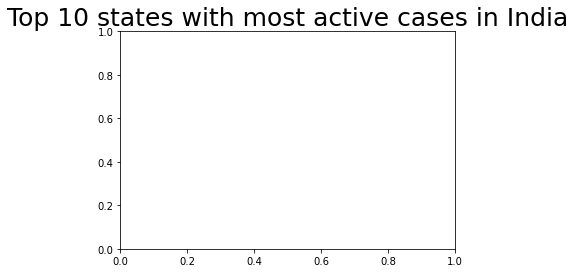

In [42]:
plt.title("Top 10 states with most active cases in India", size = 25)

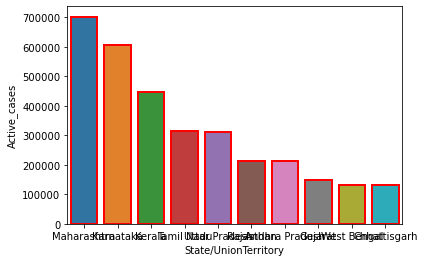

In [48]:
ax = sns.barplot(data = top_10_active_cases.iloc[:10],y = "Active_cases", x = "State/UnionTerritory", linewidth = 2 ,edgecolor= "red")

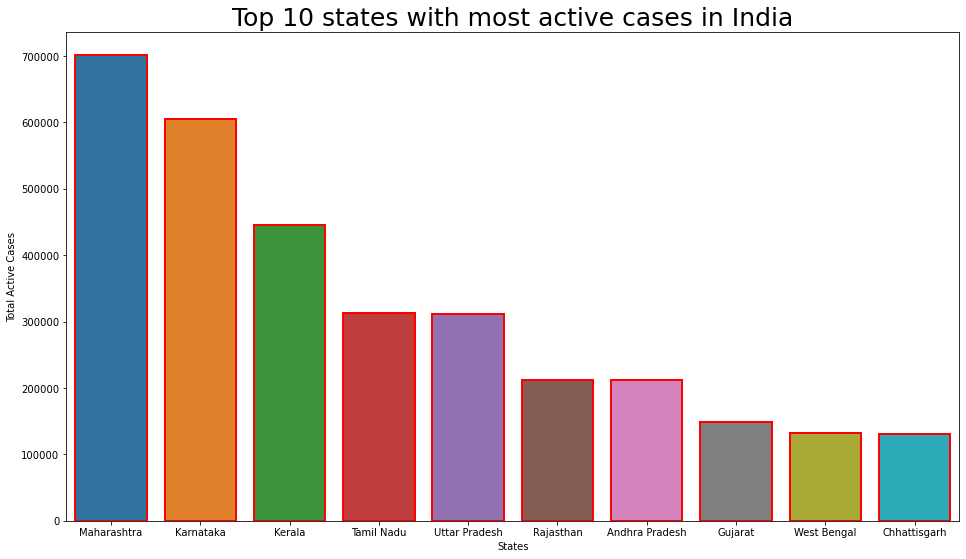

In [50]:
top_10_active_cases=covid_df.groupby(by = "State/UnionTerritory").max()[["Active_cases","Date"]].sort_values(by = ['Active_cases'],ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in India", size = 25)
ax = sns.barplot(data = top_10_active_cases.iloc[:10],y = "Active_cases", x = "State/UnionTerritory", linewidth = 2 ,edgecolor= "red")
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()